In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [3]:
from sklearn.datasets import load_files

reviews_train = load_files("../data/aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decisio

In [4]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words="english", min_df=4)
X_train = vect.fit_transform(text_train)

In [6]:
X_train.shape

(25000, 30462)

In [7]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=100)
X_lsa = lsa.fit_transform(X_train)

In [8]:
lsa.components_.shape

(100, 30462)

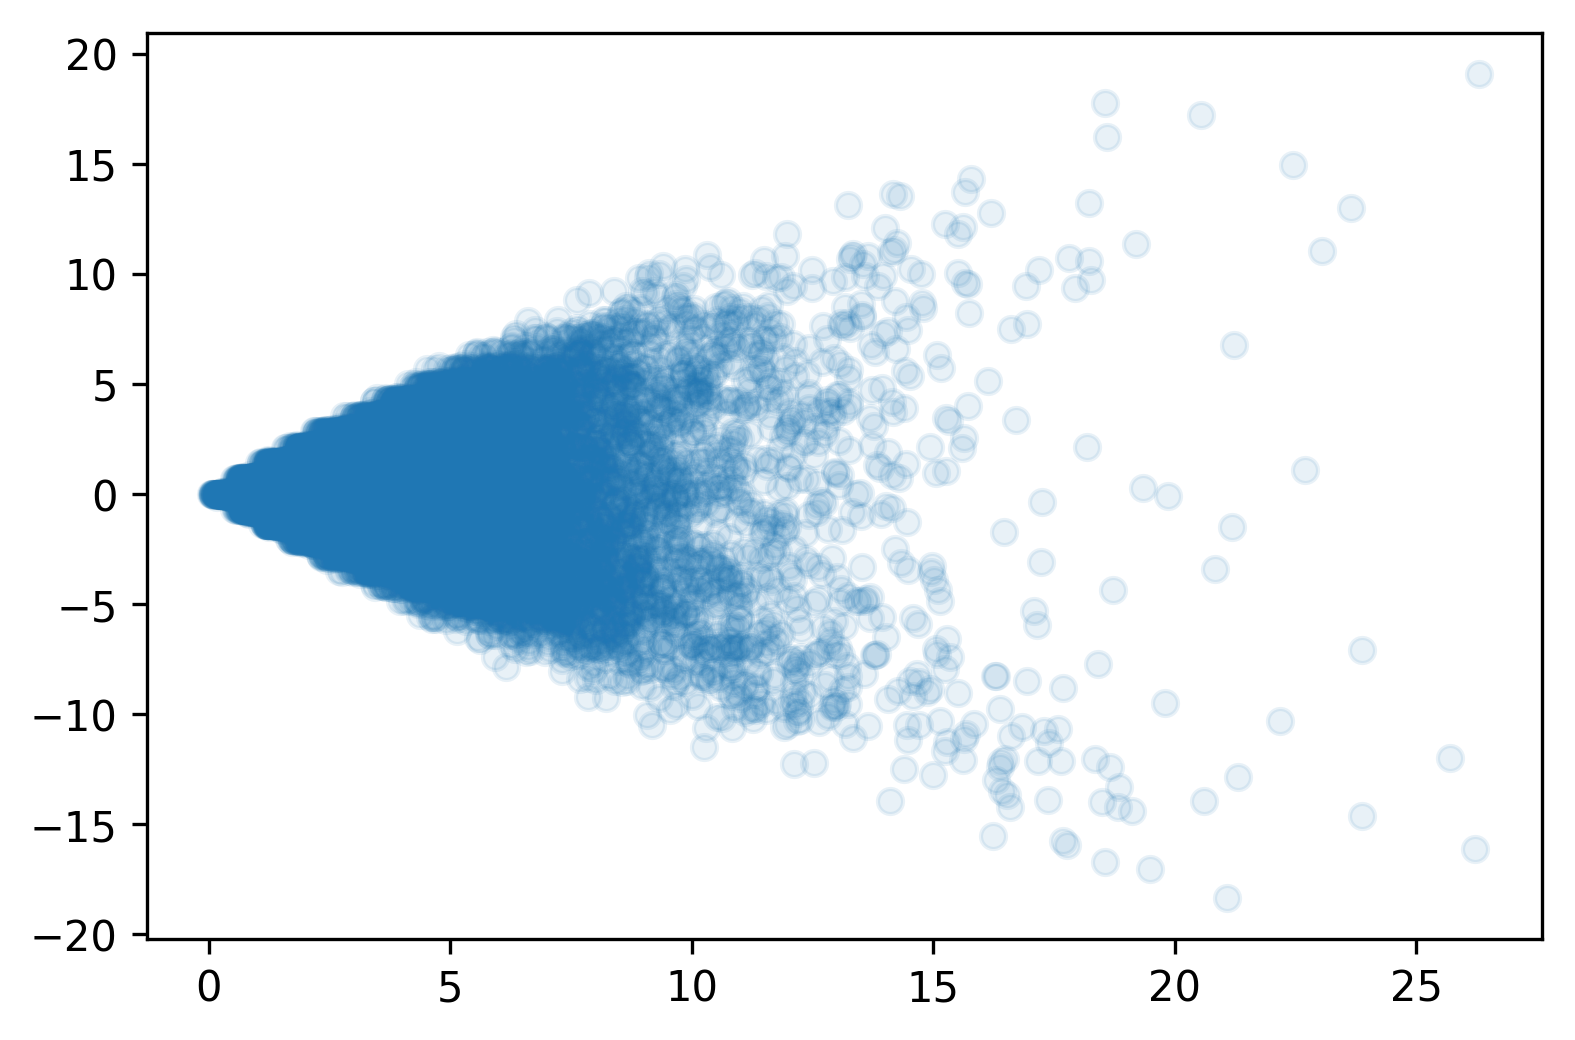

In [9]:
plt.scatter(X_lsa[:, 0], X_lsa[:, 1], alpha=.1)

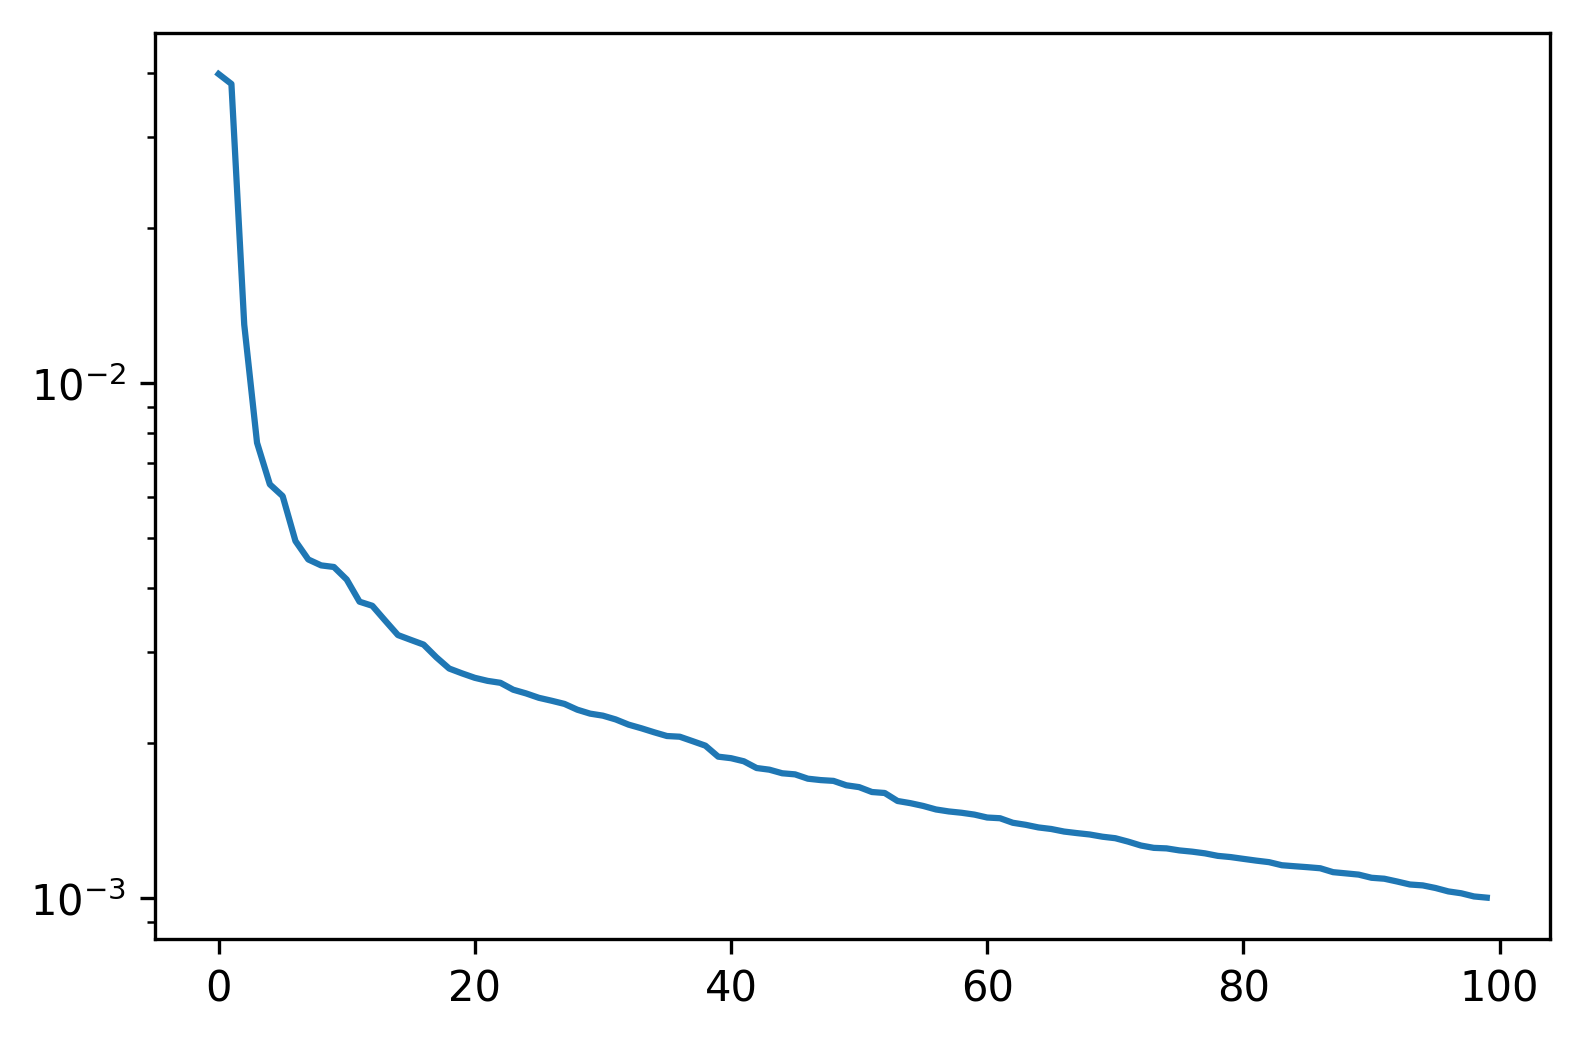

In [11]:
plt.semilogy(lsa.explained_variance_ratio_)

In [57]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

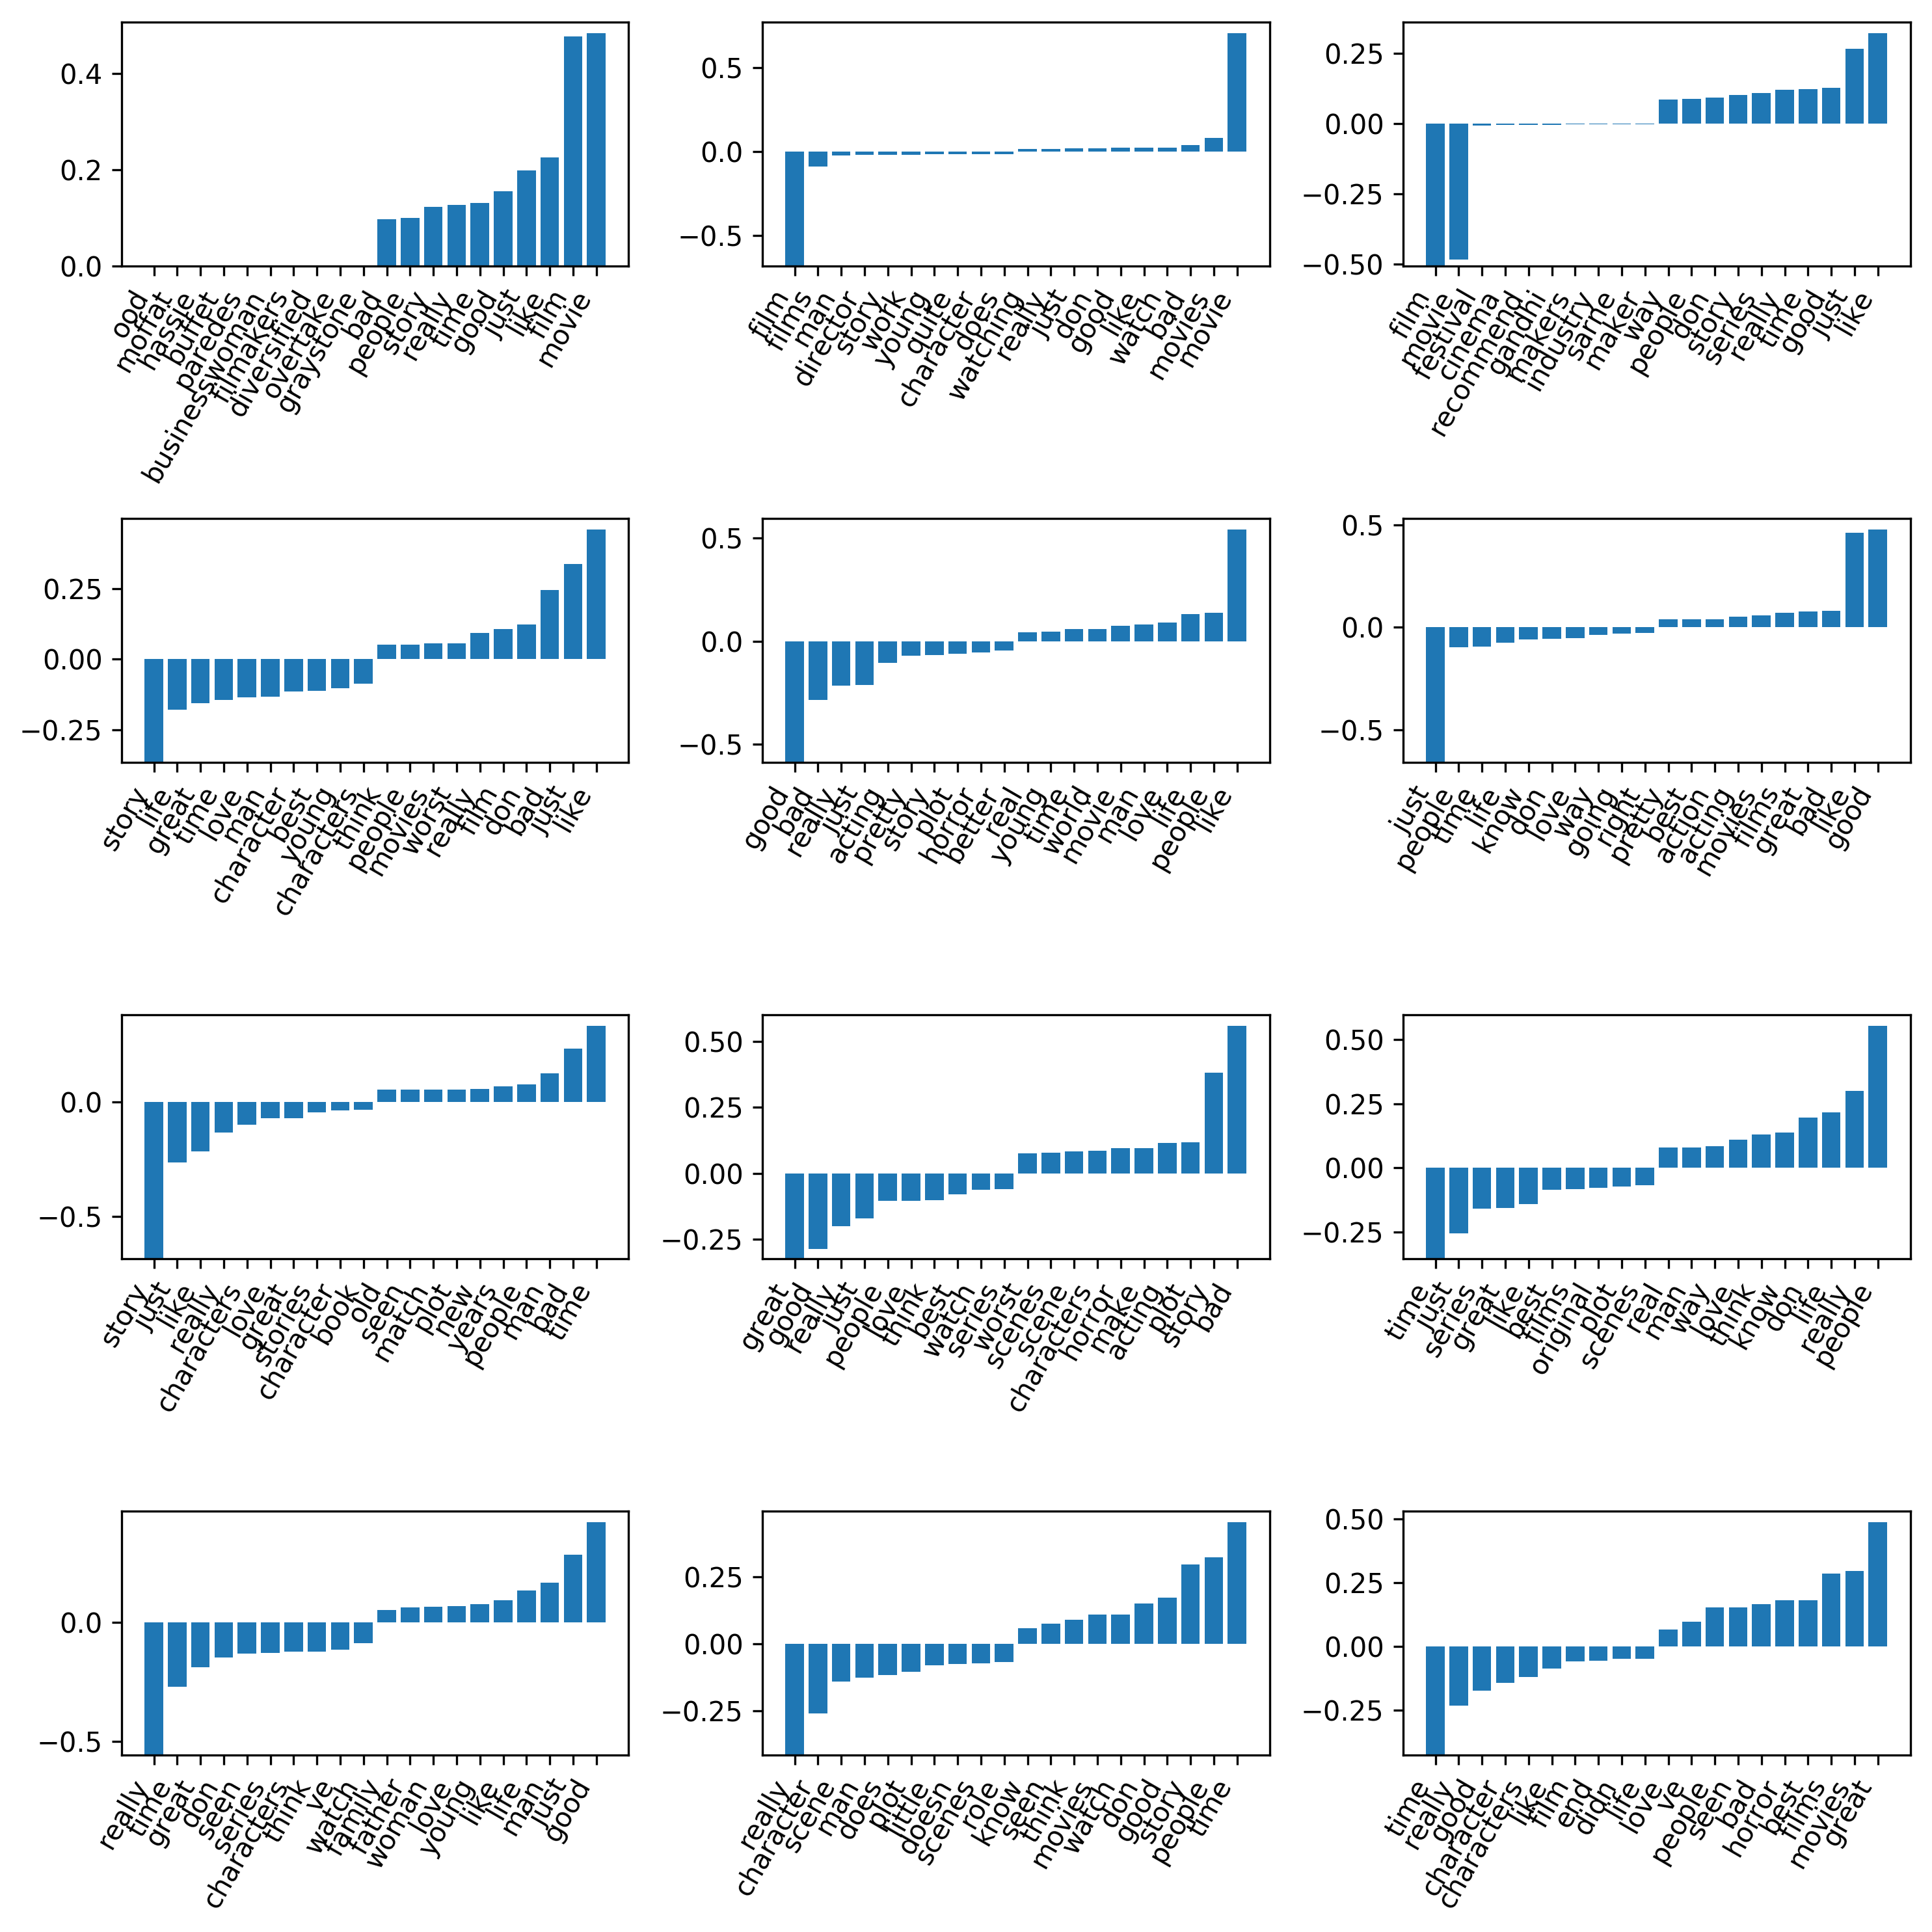

In [13]:
feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), lsa.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

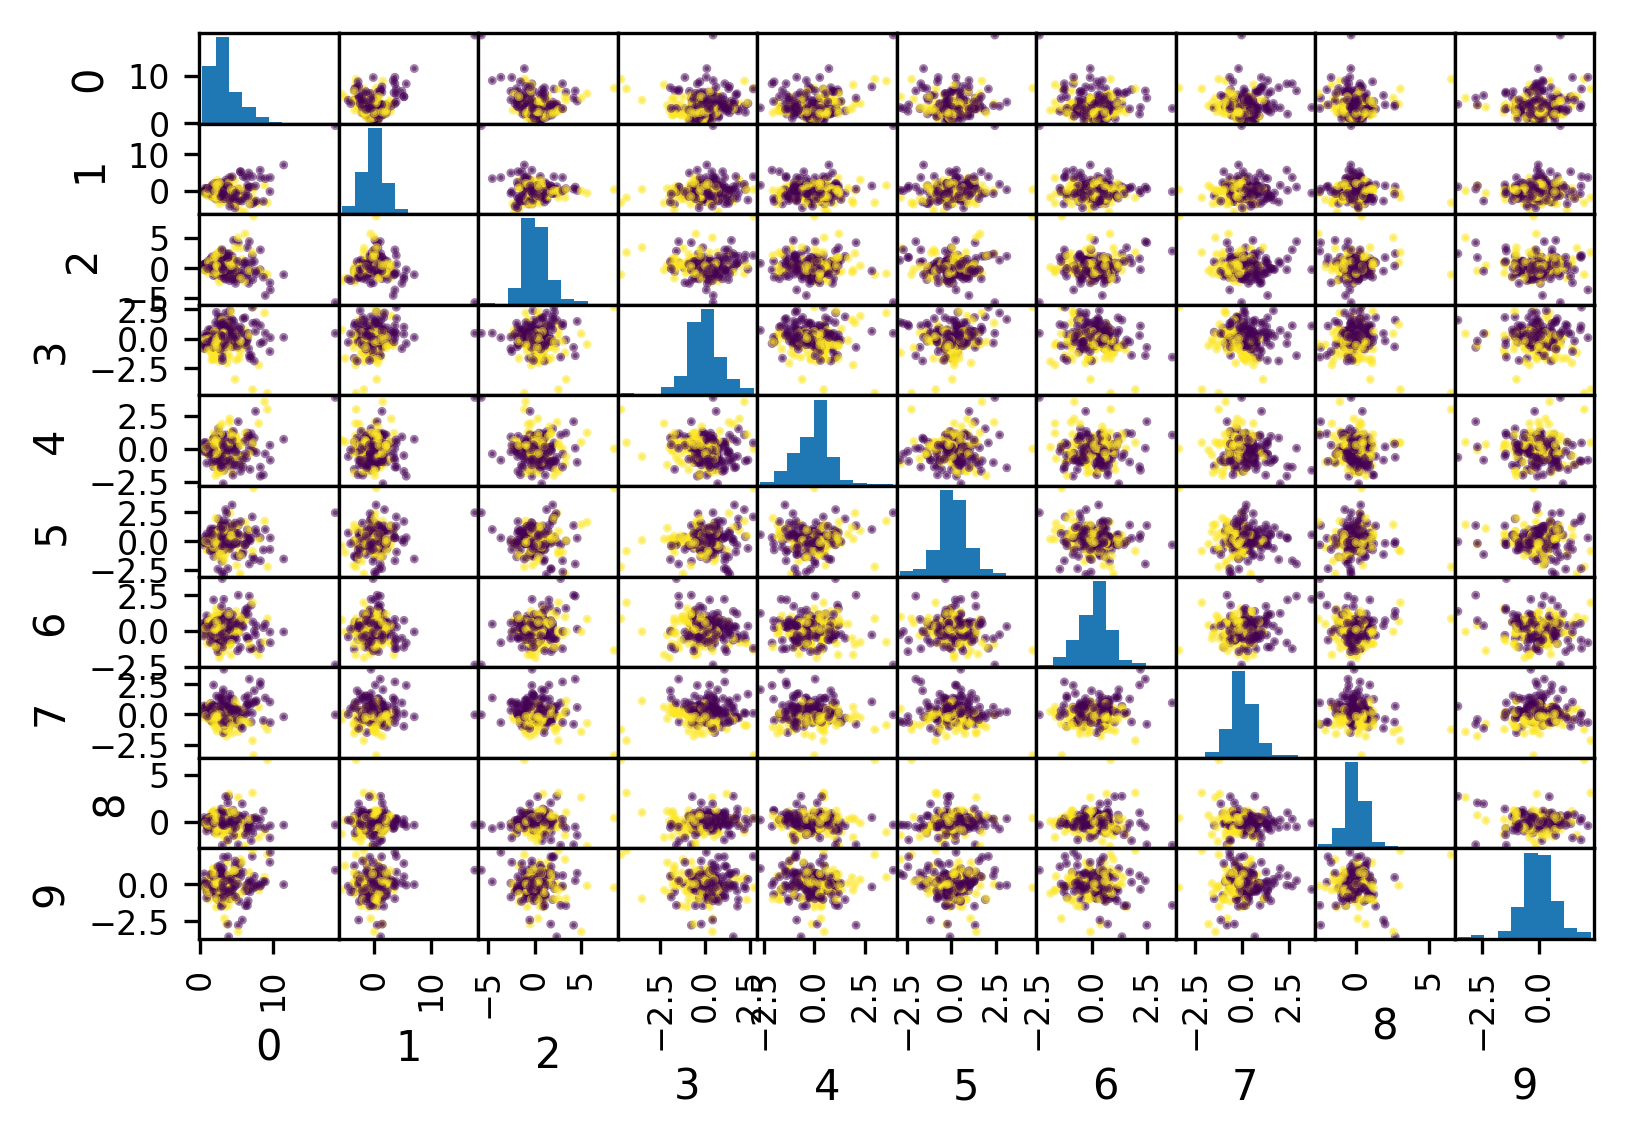

In [15]:
df = pd.DataFrame(X_lsa[::100, :10])
pd.tools.plotting.scatter_matrix(df, c=y_train[::100], s=5);

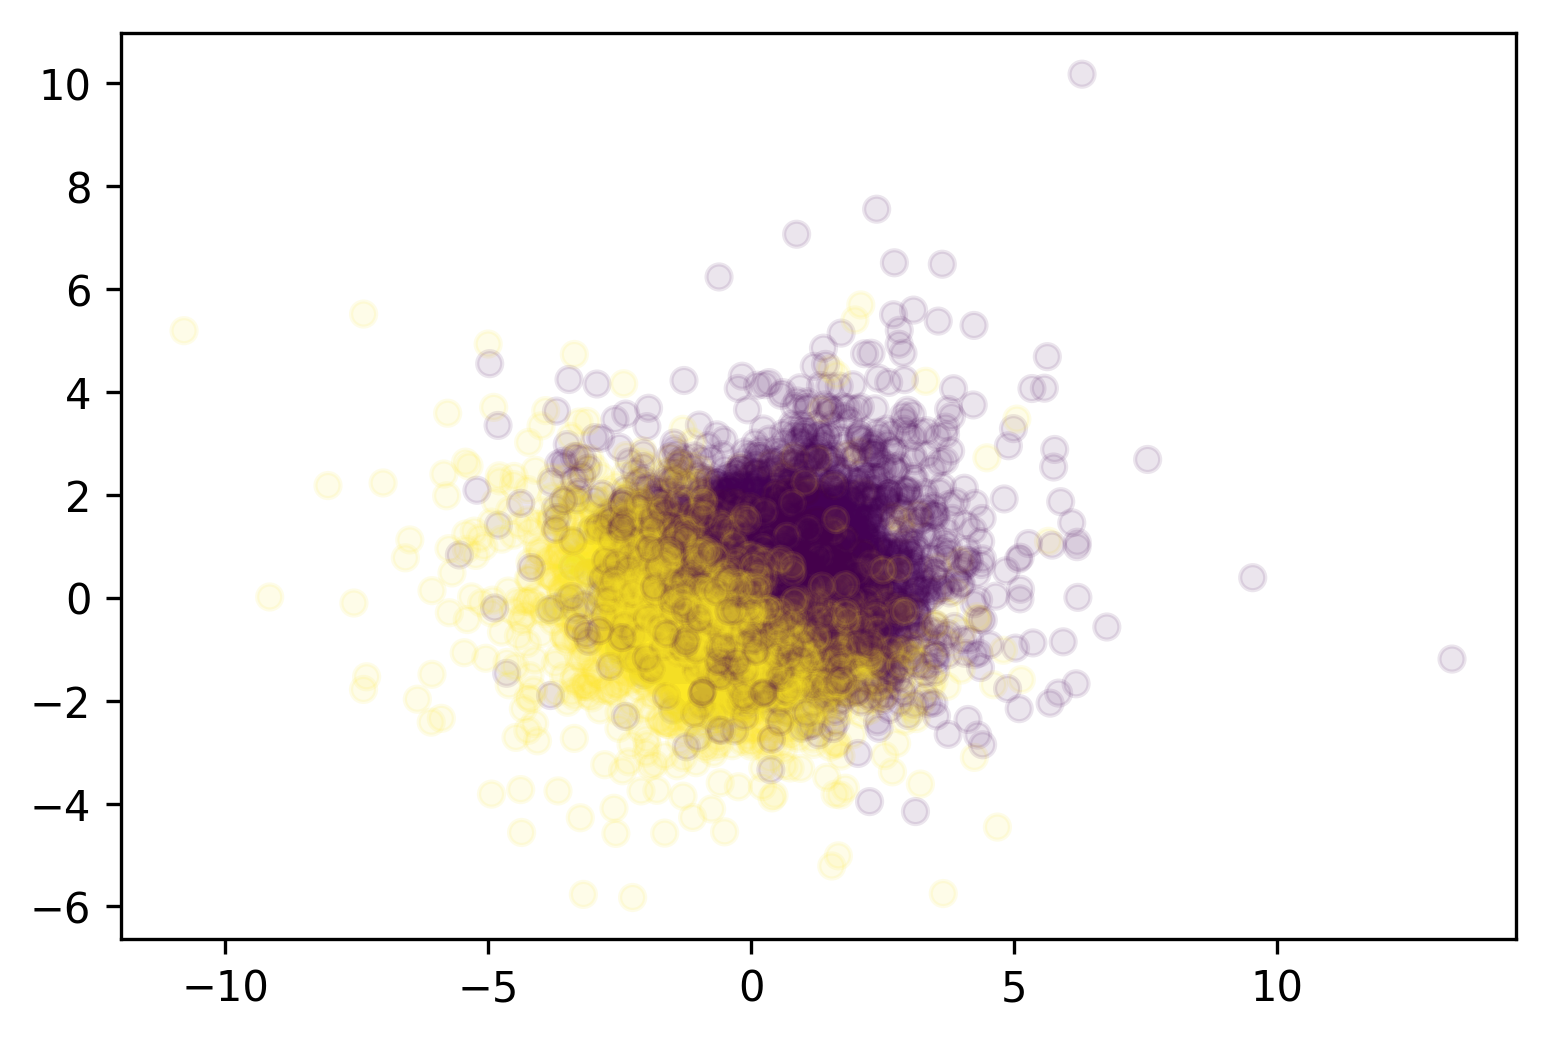

In [17]:
plt.scatter(X_lsa[:, 3], X_lsa[:, 7], alpha=.1, c=y_train)

In [30]:
from sklearn.preprocessing import MaxAbsScaler, Normalizer
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_train)
X_normalized = Normalizer().fit_transform(X_train)

lsa_normalized = TruncatedSVD(n_components=100)
X_lsa_normalized = lsa_normalized.fit_transform(X_normalized)

/home/andy/checkout/scikit-learn/sklearn/utils/validation.py:427: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


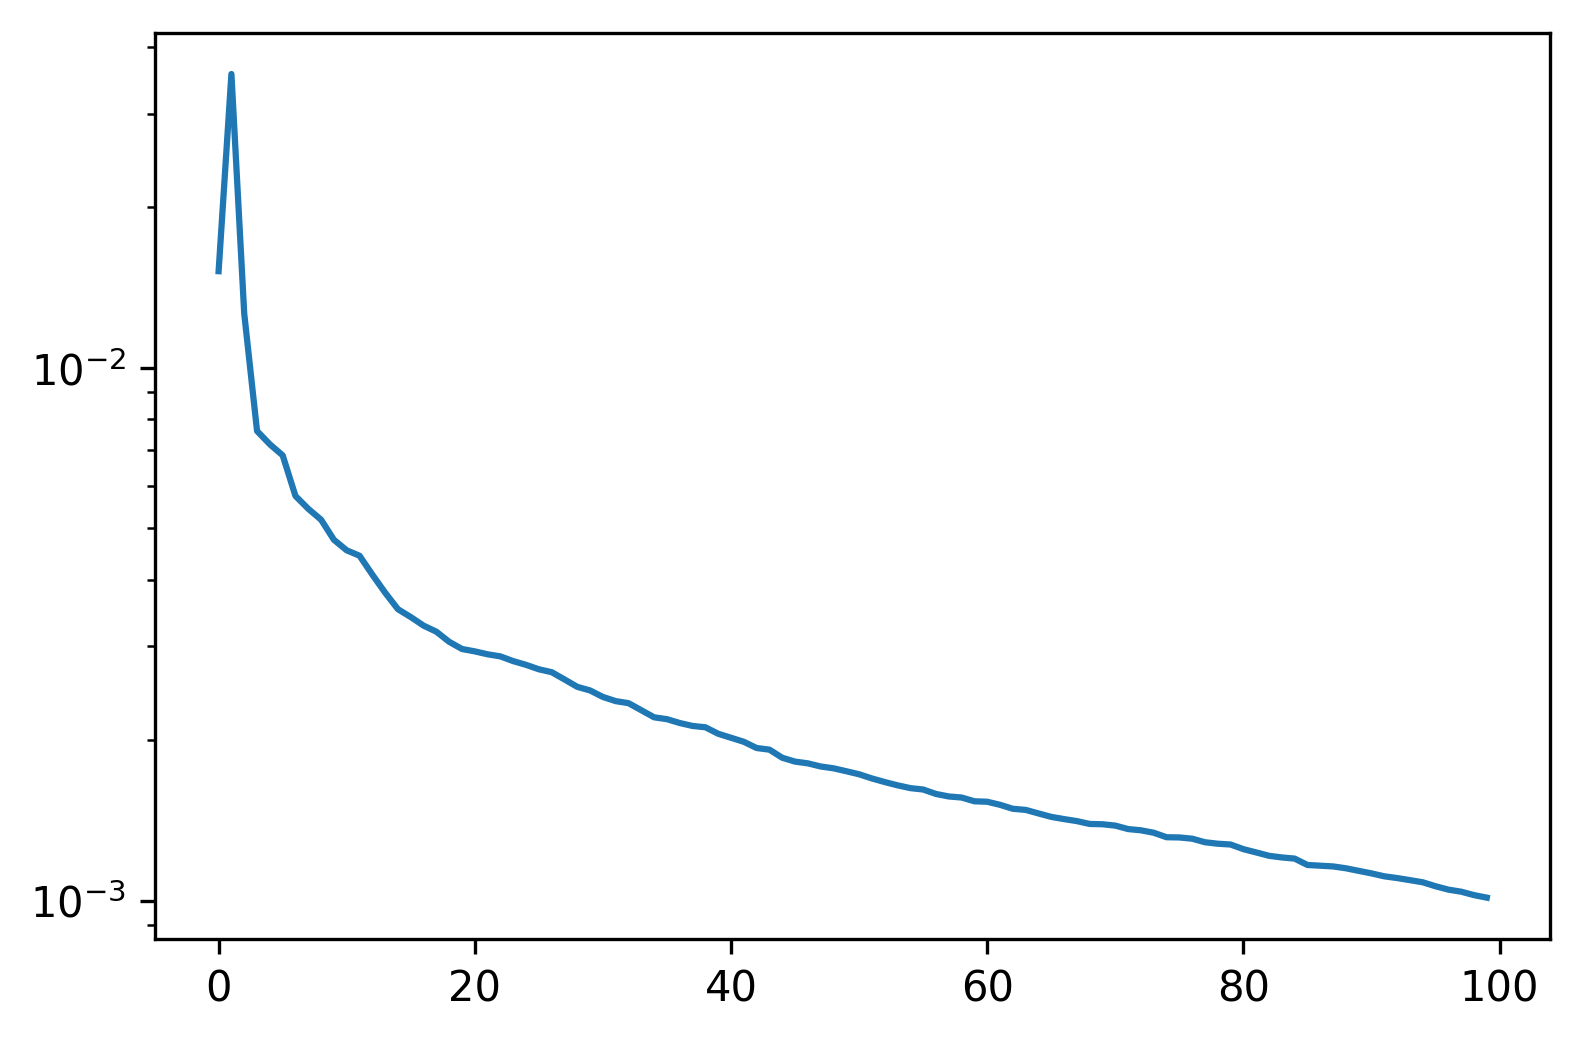

In [22]:
plt.semilogy(lsa_normalized.explained_variance_ratio_)

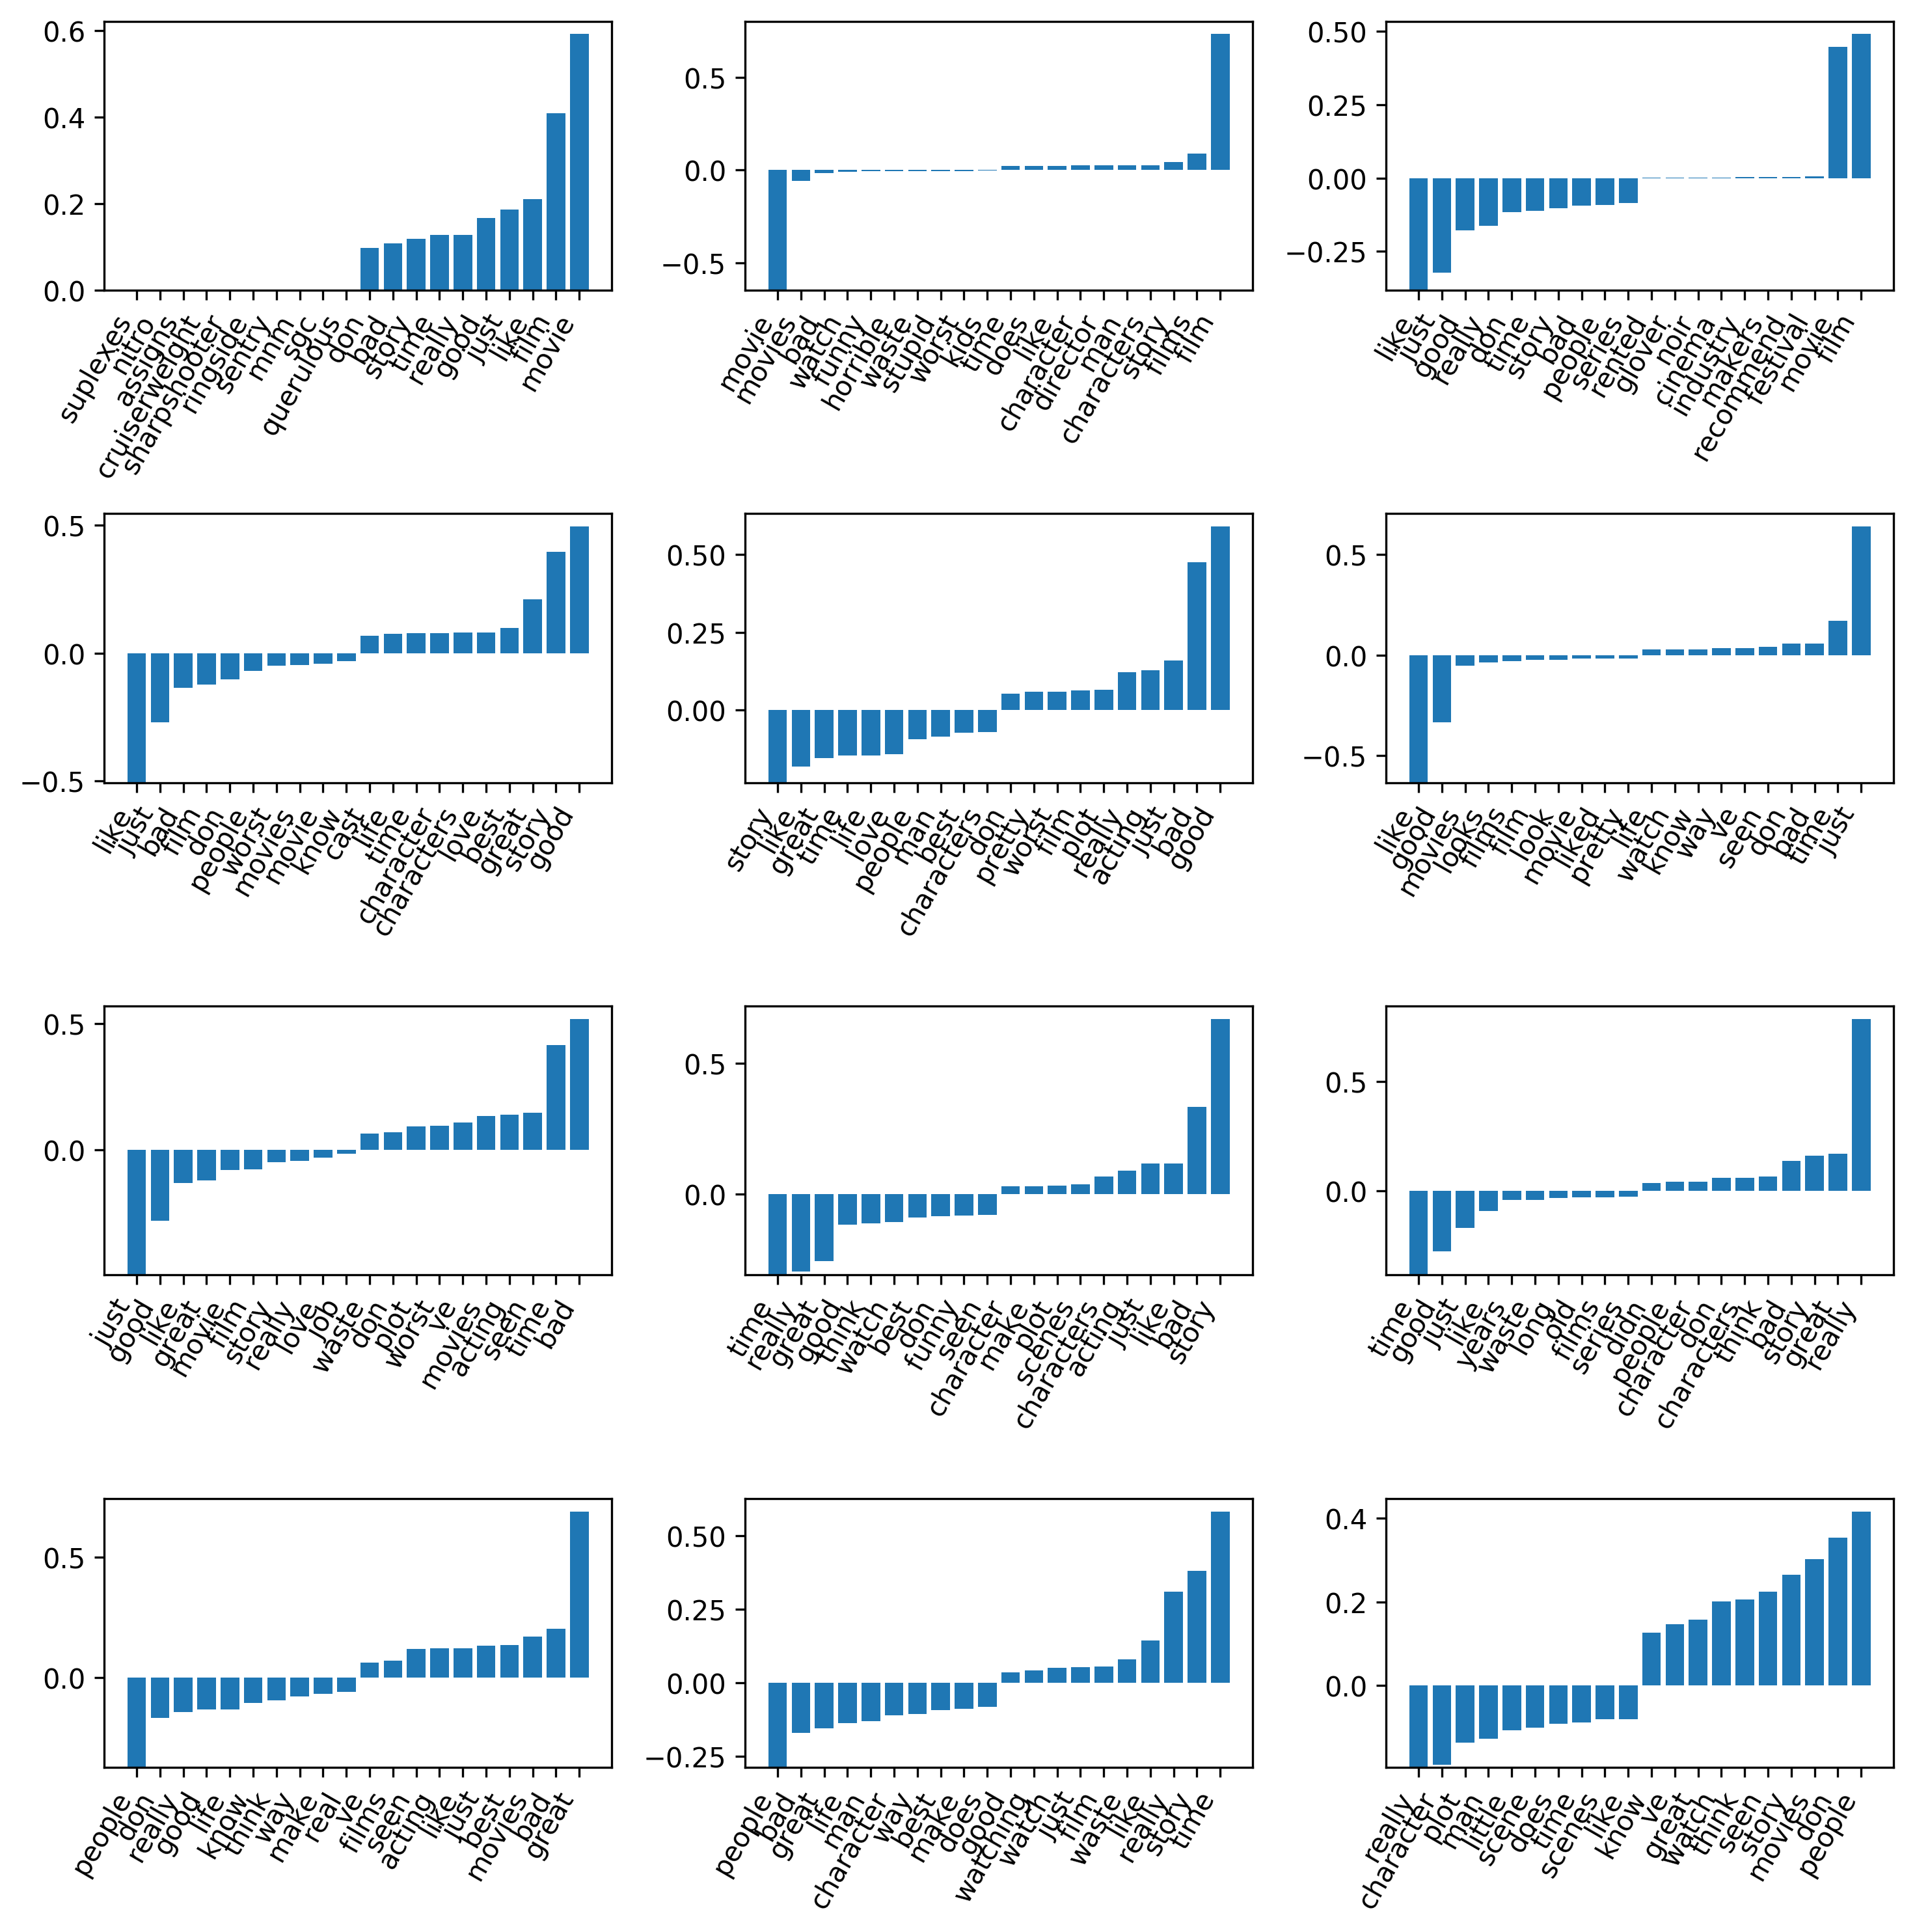

In [23]:
feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), lsa_normalized.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

In [24]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_train)

lsa_scaled = TruncatedSVD(n_components=100)
X_lsa_scaled = lsa_scaled.fit_transform(X_scaled)

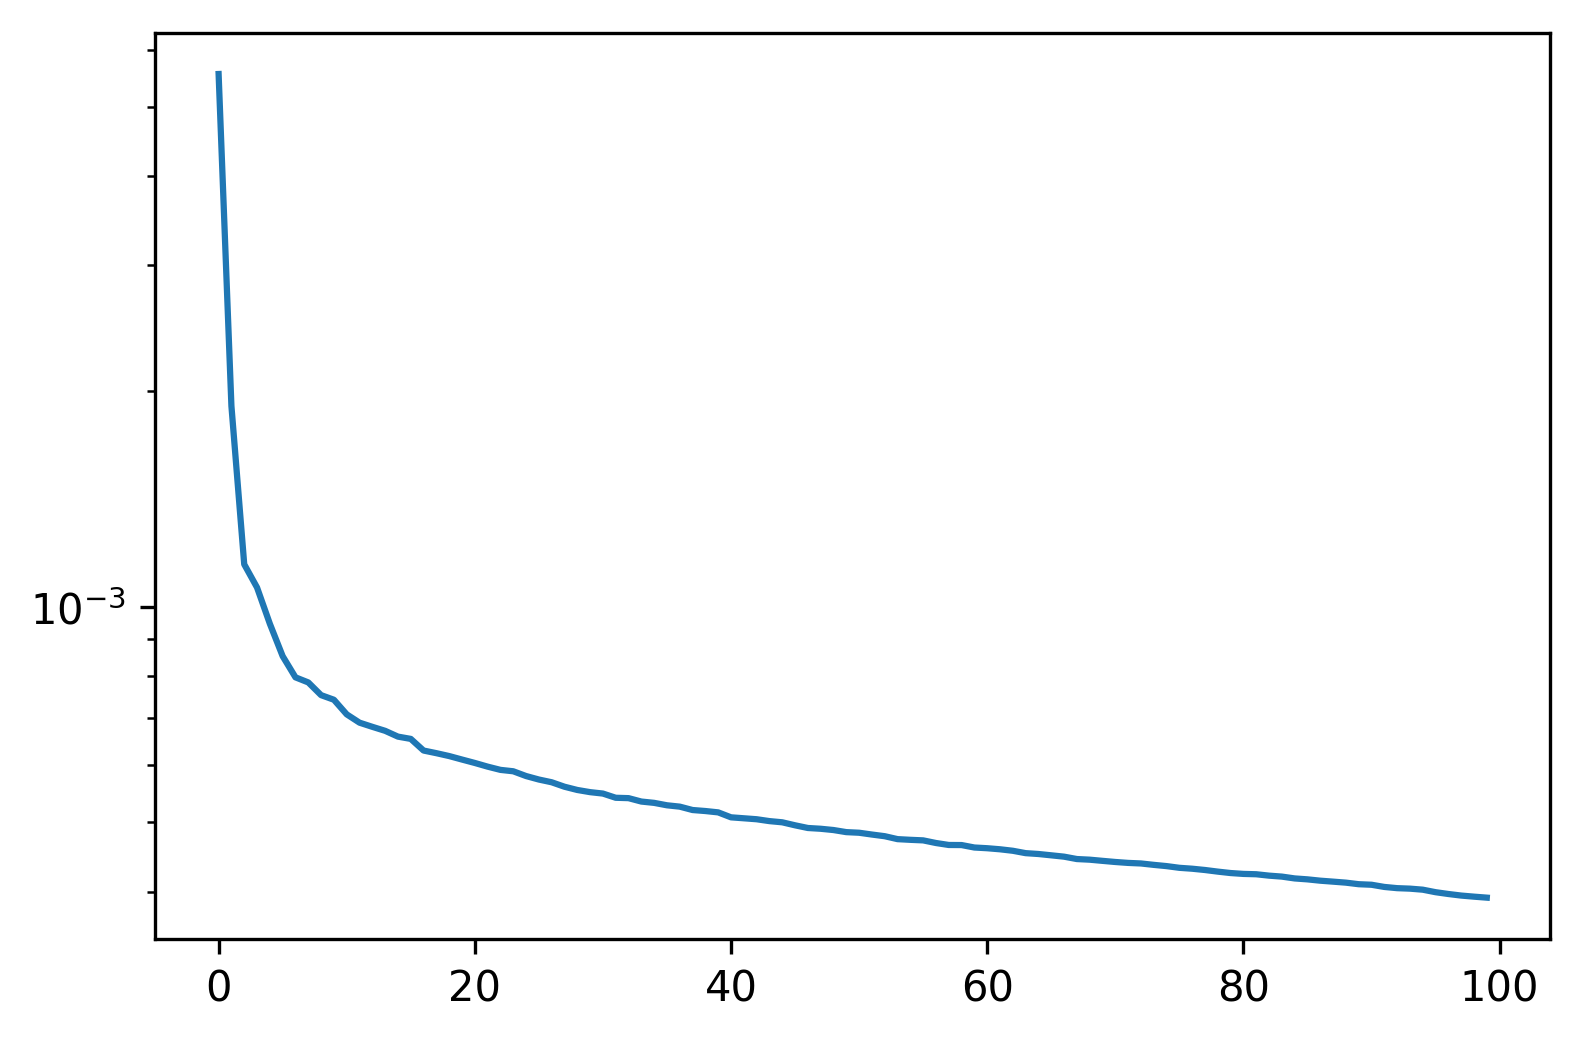

In [25]:
plt.semilogy(lsa_scaled.explained_variance_ratio_)

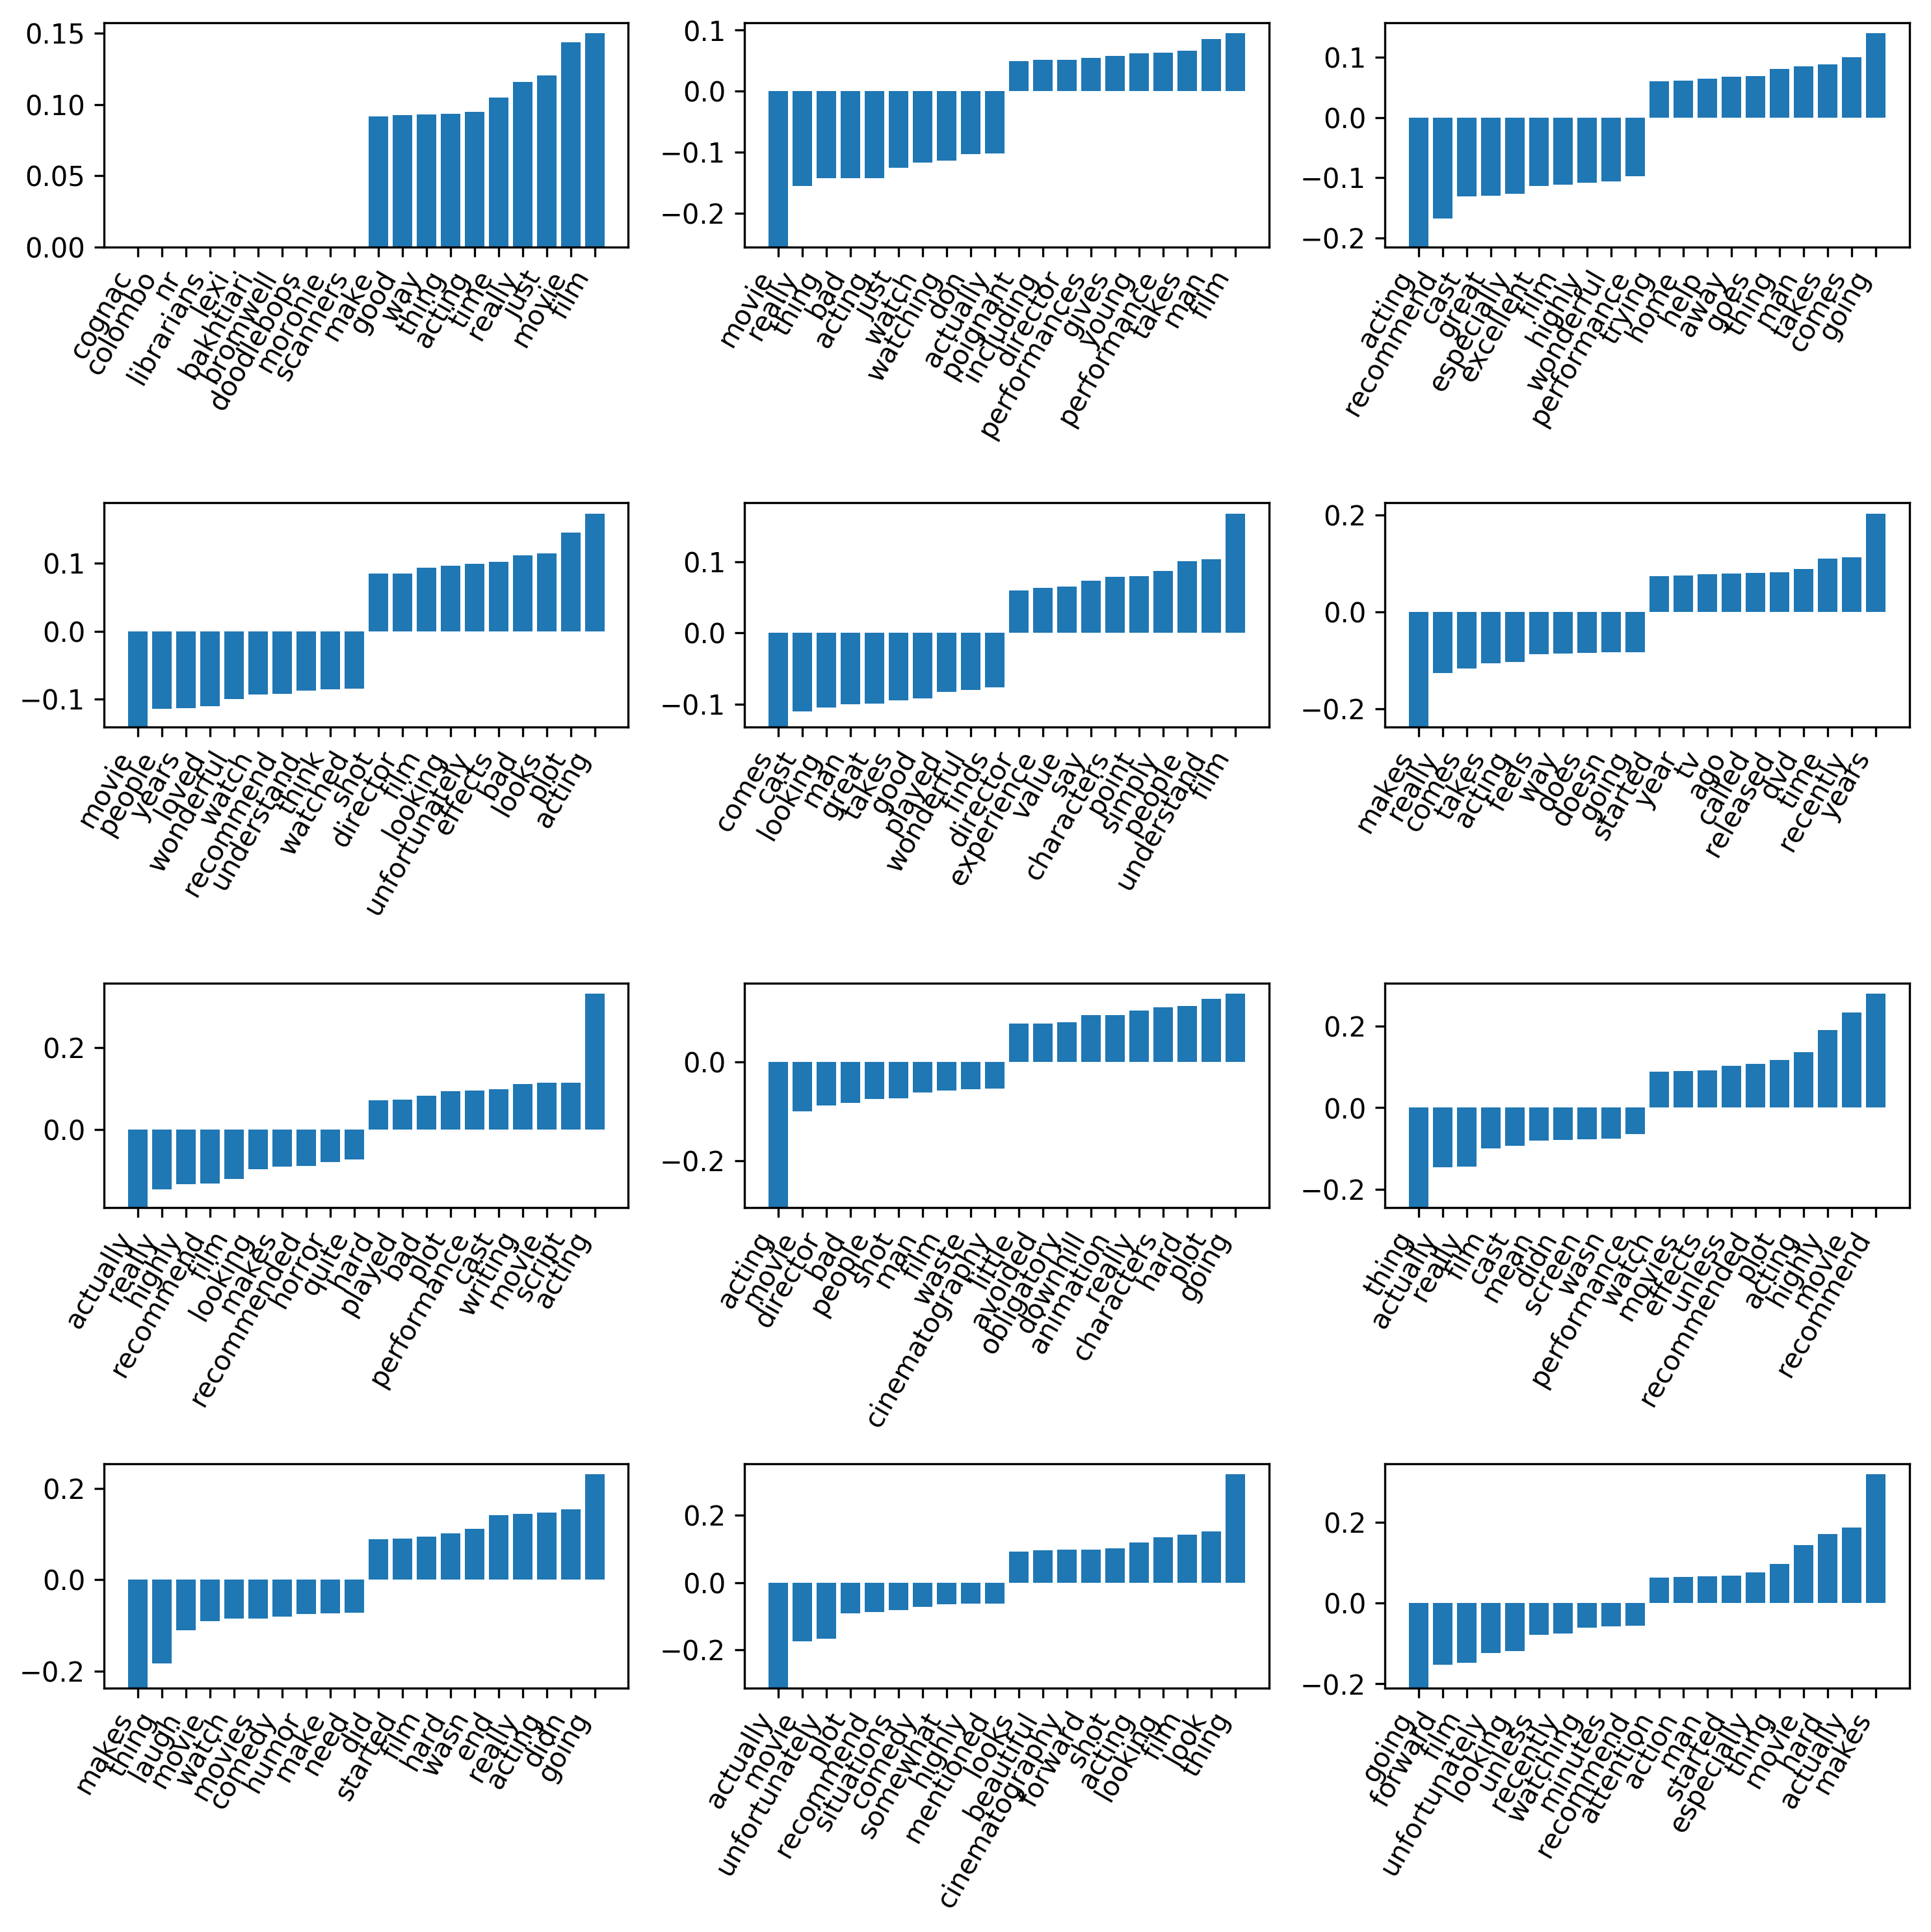

In [26]:
feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), lsa_scaled.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

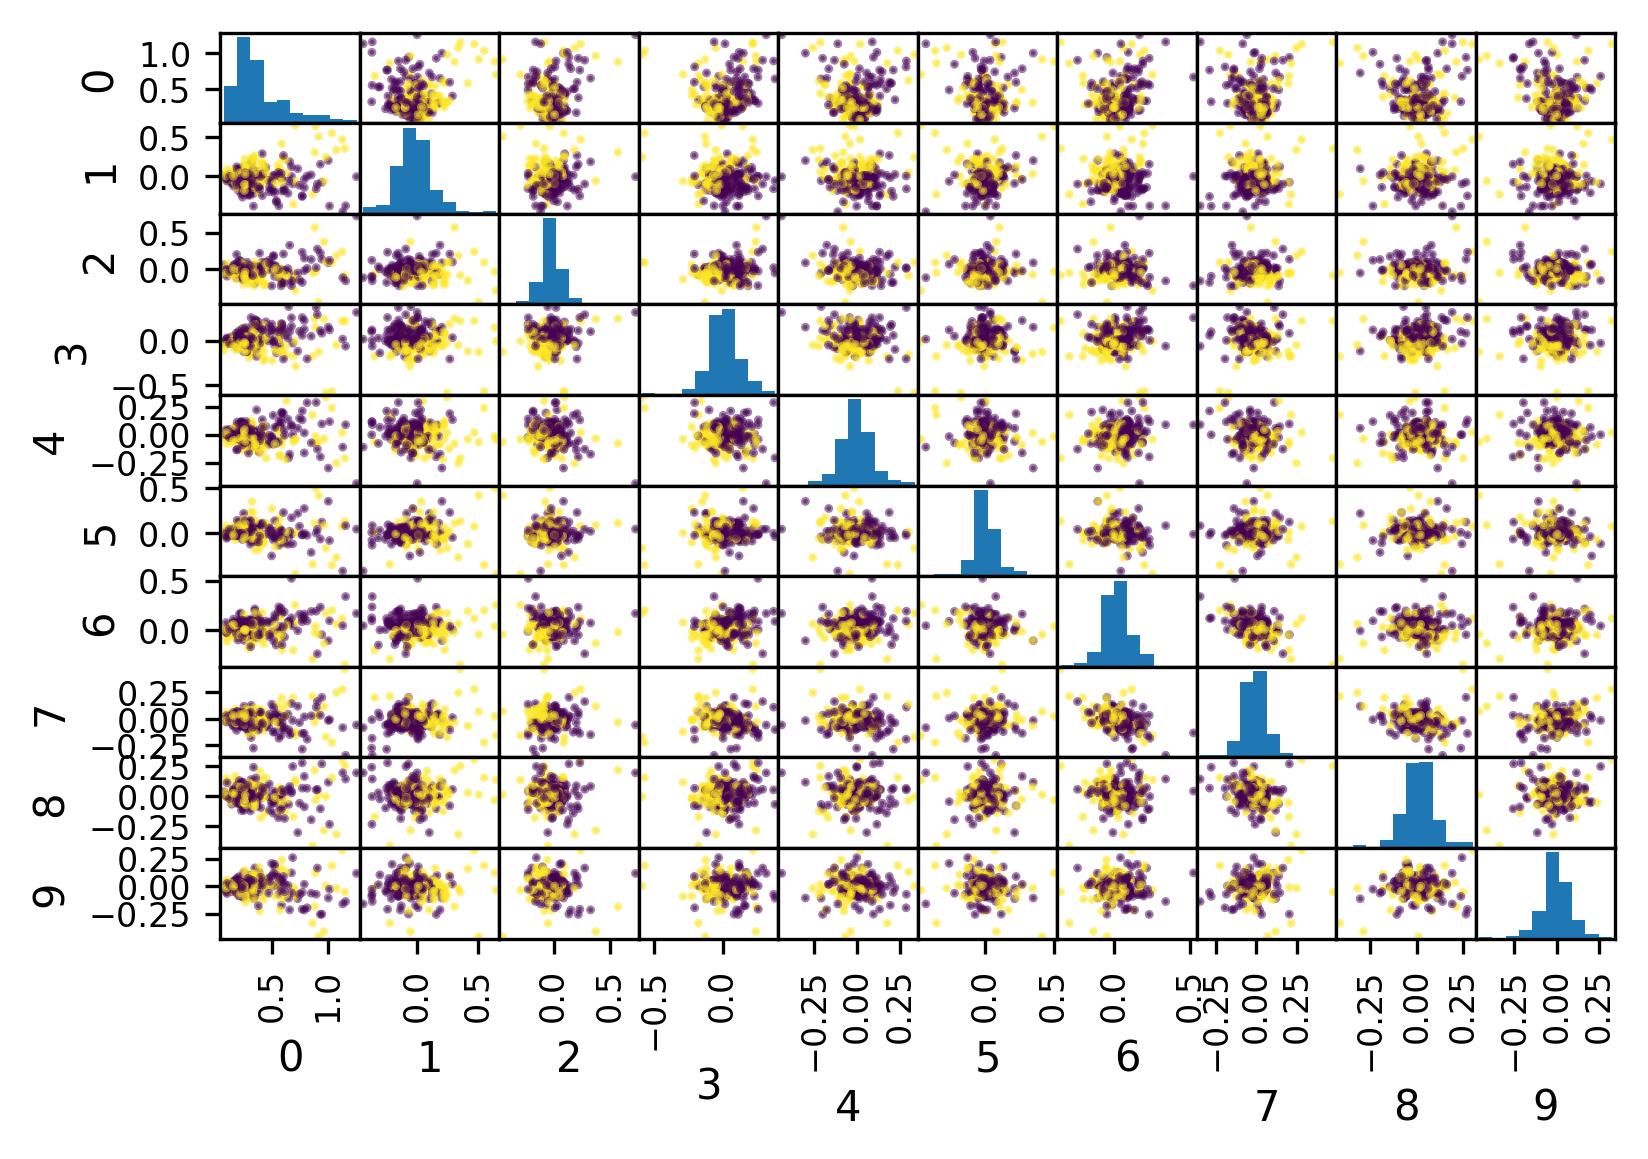

In [27]:
df_scaled = pd.DataFrame(X_lsa_scaled[::100, :10])
pd.tools.plotting.scatter_matrix(df_scaled, c=y_train[::100], s=5);

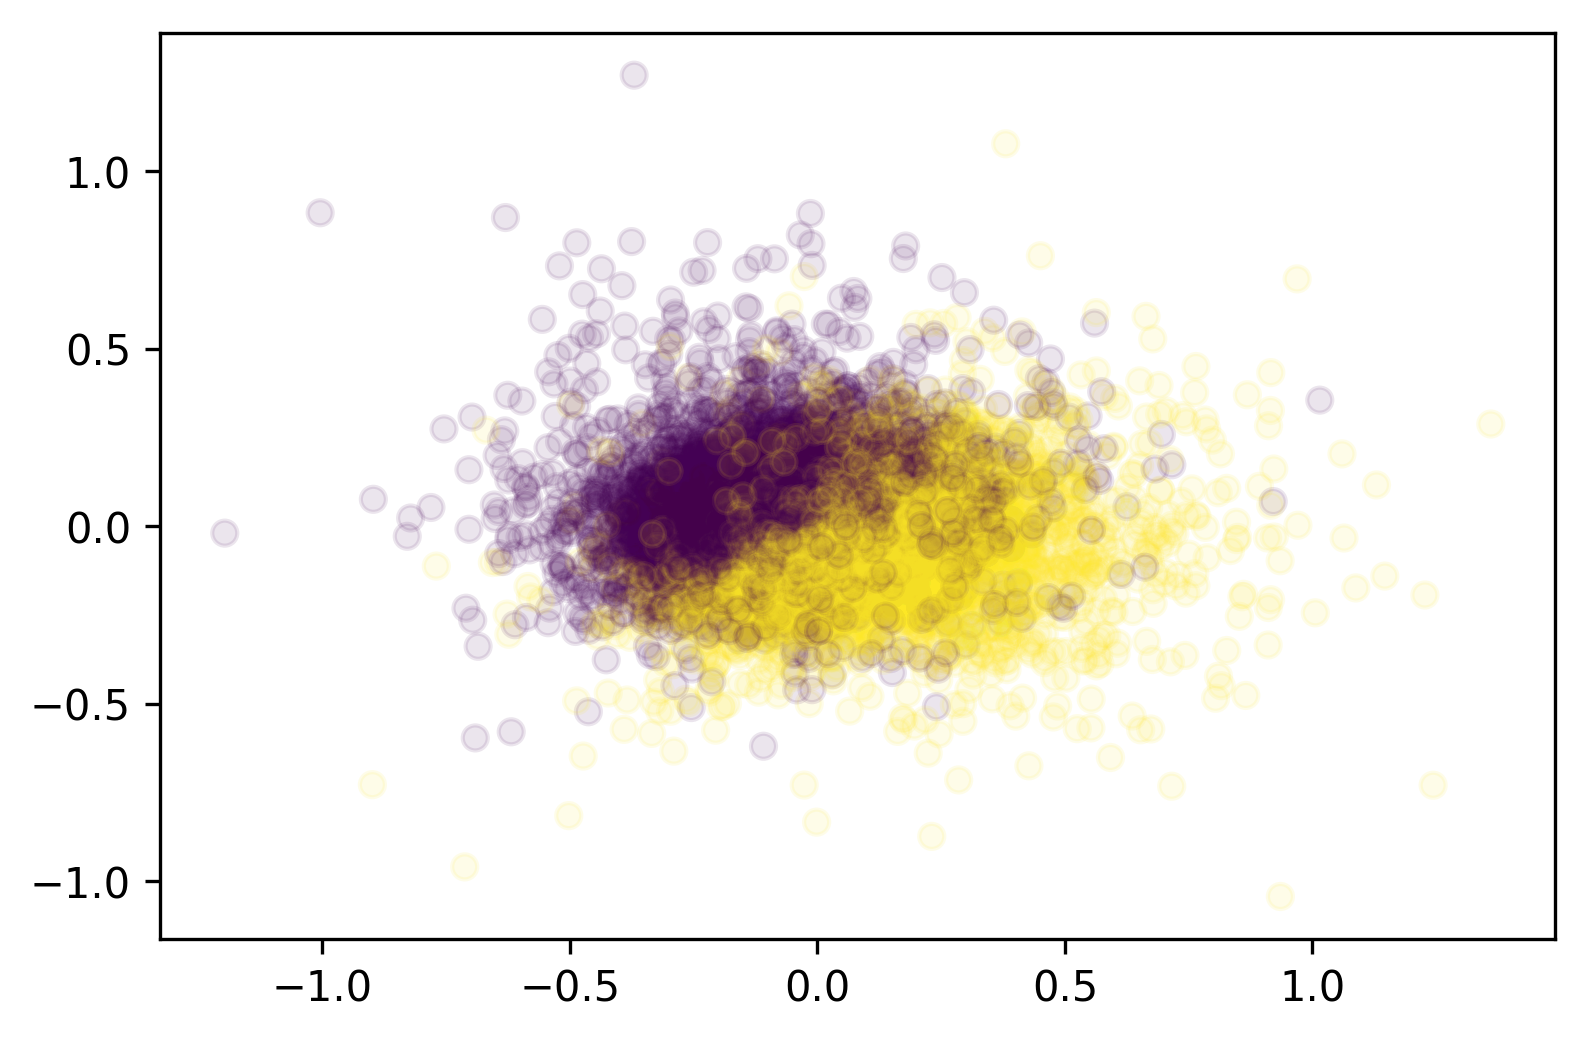

In [29]:
plt.scatter(X_lsa_scaled[:, 1], X_lsa_scaled[:, 3], alpha=.1, c=y_train)

In [34]:
reviews_test = load_files("../data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]
X_test = vect.transform(text_test)

In [35]:
X_test_lsa_scaled = lsa_scaled.transform(scaler.transform(X_test))

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=.1).fit(X_train, y_train)
lr.score(X_test, y_test)

0.87263999999999997

In [52]:
lr_lsa = LogisticRegression(C=100).fit(X_lsa_scaled[:, :10], y_train)
lr_lsa.score(X_test_lsa_scaled[:, :10], y_test)

0.82711999999999997

In [54]:
lr_lsa.score(X_lsa_scaled[:, :10], y_train)

0.82808000000000004

In [47]:
lsa_scaled1k = TruncatedSVD(n_components=1000)
X_lsa_scaled1k = lsa_scaled1k.fit_transform(X_scaled)

In [48]:
X_test_lsa_scaled1k = lsa_scaled1k.transform(scaler.transform(X_test))

In [49]:
lr_lsa = LogisticRegression().fit(X_lsa_scaled1k, y_train)
lr_lsa.score(X_test_lsa_scaled1k, y_test)

0.87448000000000004

In [51]:
lr_lsa.score(X_lsa_scaled1k, y_train)

0.89392000000000005

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=100, verbose=10)
X_nmf = nmf.fit(X_scaled)